In [7]:
# coding: utf-8
import scipy.io as io
from scipy import optimize
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
plt.gray();
import matplotlib.patheffects as pe
import seaborn as sb
from sklearn.manifold import TSNE 
from numpy import *
from sklearn.decomposition import PCA
%matplotlib inline
# from IPython.display import display
# np.set_printoptions(suppress=True, threshold=np.nan)    #去除科学计数法

In [9]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

def pca(dataMat, K=999999):
    meanVals = mean(dataMat, axis=0)
    DataAdjust = dataMat - meanVals           #减去平均值
    covMat = cov(DataAdjust, rowvar=0)
    eigVals,eigVects = linalg.eig(covMat) #计算特征值和特征向量
    #print eigVals
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(K+1):-1]   #保留最大的前K个特征值
    redEigVects = eigVects[:,eigValInd]        #对应的特征向量
    lowDDataMat = np.dot(DataAdjust, redEigVects)    #将数据转换到低维新空间
    #reconMat = (lowDDataMat * redEigVects.T) + meanVals   #重构数据，用于调试
    return lowDDataMat#, reconMat

def getUniformData(X,Y,n):
    n_per_class=int(n/10)
    X_uniform=[]
    Y_uniform=[]
    for i in range(10):
        Xi=X[Y[:,0] == i]
        randIndices=[np.random.randint(0, Xi.shape[0]) for i in range(n_per_class)]
        X_uniform.append(Xi[randIndices])
        Yi=Y[(Y[:,0]==i)]
        Y_uniform.append(Yi[randIndices])
    X_uniform=np.vstack(np.array(X_uniform))
    Y_uniform=np.vstack(np.array(Y_uniform))
    return X_uniform, Y_uniform

n=1000
n_test=250
dopca=0
mat = io.loadmat('./data/train_32x32.mat')
X = mat['X'] # (32, 32, 3, 73257)
Y = mat['y'] # (73257, 1)
Y[Y == 10] = 0
X = X.transpose((3, 0, 1, 2))
X, Y = getUniformData(X,Y,n)
# randIndices = [np.random.randint(0, X.shape[0]) for i in range(n)]
# X = X[randIndices]
# Y = Y[randIndices]
X = rgb2gray(X).astype(np.float32)
X=X.reshape(n,-1)  # (73257,3072)
X_mean = np.mean(X, axis=0)  # 第一维变化，对其他维每个位置上求均值和方差
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std
X = np.column_stack((np.full((n,1),1),X)) #  hstack
# X=X/255
# X=(X/255-0.5)*2
if dopca:
    pca = PCA(n_components=100)
    pca.fit(X)                  #训练
    X=pca.fit_transform(X)   #降维后的数据
# X=pca(X,45)
d=X.shape[1]

mat = io.loadmat('./data/test_32x32.mat')
X_test = mat['X']
Y_test = mat['y']
Y_test[Y_test == 10] = 0
X_test = X_test.transpose((3, 0, 1, 2))
X_test, Y_test = getUniformData(X_test, Y_test,n_test)
# randIndicesTest = [np.random.randint(0, X_test.shape[0]) for i in range(n_test)]
# X_test = X_test[randIndicesTest]
# Y_test = Y_test[randIndicesTest]
X_test = rgb2gray(X_test).astype(np.float32)
X_test=X_test.reshape(n_test,-1)
X_test = (X_test - X_mean) / X_std
X_test = np.column_stack((np.full((n_test,1),1),X_test))
# X_test=(X_test/255-0.5)*2
# X_test=X_test/255
if dopca:
    pca_test = PCA(n_components=d)
    pca_test.fit(X_test)                  #训练
    X_test=pca_test.fit_transform(X_test)   #降维后的数据
# X_test=pca(X_test,45)

print(X.shape,Y.shape,X_test.shape,Y_test.shape)

(1000, 1025) (1000, 1) (250, 1025) (250, 1)


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:title={'center':'svm_pca_test_tSNE.png'}, xlabel='X', ylabel='Y'>,
 [Text((-0.775871870726216+0j), (-2.4519237964138973+0j), '0'),
  Text((-2.728914798543696+0j), (-1.7043220922303652+0j), '1'),
  Text((2.6168310756962416+0j), (2.3793007002864965+0j), '2'),
  Text((-4.350765997082391+0j), (0.6019640609169401+0j), '3'),
  Text((0.13164073703428836+0j), (-1.820725099755093+0j), '4'),
  Text((-4.89205981066454+0j), (0.7858254603406077+0j), '5'),
  Text((1.720988723098897+0j), (-1.3162899979518012+0j), '6'),
  Text((-4.431880822876581+0j), (-0.8249546613558584+0j), '7'),
  Text((6.6726137277447+0j), (-2.661392532480603+0j), '8'),
  Text((-1.4601465658952675+0j), (-2.013003882783393+0j), '9')])

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\matplotlib\text.py:824: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\matplotlib\text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\matplotlib\text.py:684: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(textobj.convert_xunits(textobj._x))
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\matplotlib\text.py:685: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


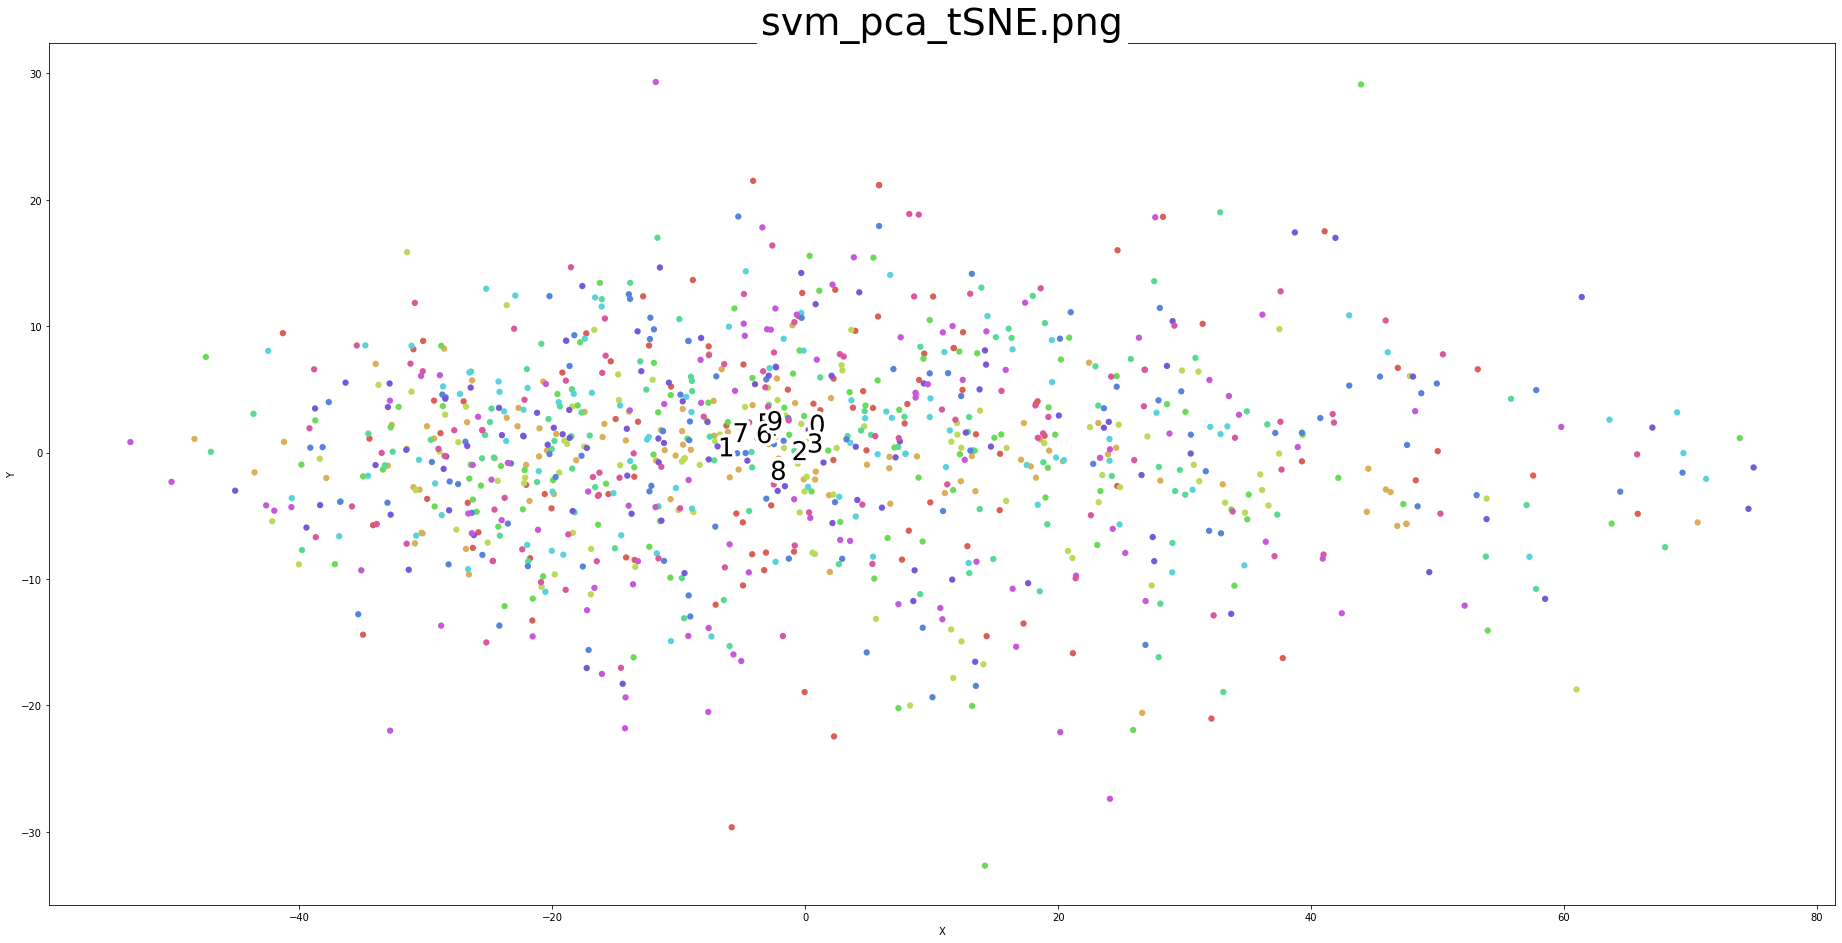

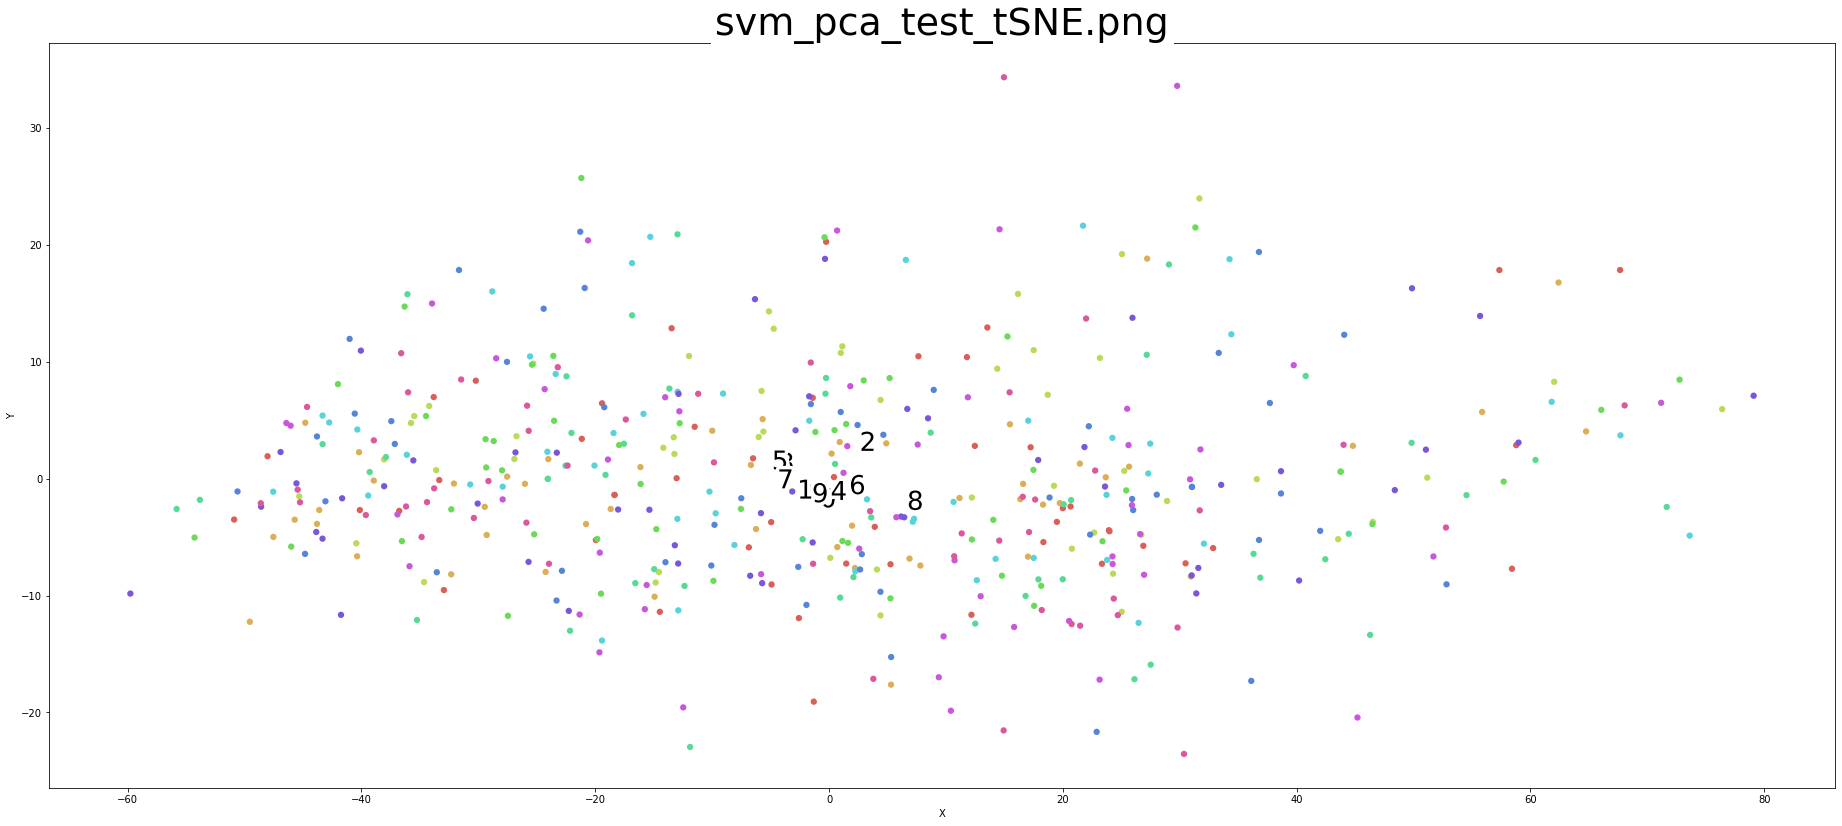

In [86]:
img_size=32
def show_data(imgs):
    pad=1      #图片分割线宽度
    show_imgs=-np.ones((pad+10*(32+pad),pad+10*(32+pad),3))    # 334
    row=0
    for i in range(10):    
        for j in range(10):
            show_imgs[pad+i*(32+pad):pad+i*(32+pad)+32,pad+j*(32+pad):pad+j*(32+pad)+32]=(imgs[row,:].reshape(img_size,img_size,3))  #order=F,列优先
            row+=1
            
    plt.imshow(show_imgs/255,cmap='gray') 
    plt.axis('off')  
    plt.show()
    print(show_imgs[0,0,:])
# randIndices=[np.random.randint(0,1000) for i in range(100)]
# show_data(X[randIndices, 1:])  


def plot2D(x, colors, path_name):
    # 生成10种颜色出来
    palette = np.array(sb.color_palette("hls", 10))
    #     print(palette.shape)

    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    # 将第一维和第二维作为xy坐标
    # lw: linewidth

    # set lable
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)

    sc = ax.scatter(x[:, 0],
                    x[:, 1],
                    lw=0,
                    s=40,
                    cmap="jet",
                    marker="o",
                    c=palette[colors.astype(np.int32)])
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, 0:2], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=26)
        txt.set_path_effects(
            [pe.Stroke(linewidth=7, foreground="w"),
             pe.Normal()])
        txts.append(txt)
    plt.title(path_name, fontsize=38, color='black', backgroundcolor='white')
#     plt.savefig(path_name)
    #     plt.axis('on')
    #     plt.show()
    return f, ax, txts

plot2D(X, Y[:,0], "svm_pca_tSNE.png")
plot2D(X_test, Y_test[:,0], "svm_pca_test_tSNE.png")

In [15]:
THREASHOLD=0.3

class LogsiticRegression(object):
    w = None # 权重
    W = None
    n = 0 # 样本个数
    d = 0 # 维度个数
    learning_rate = 0.01
    loss_difference = 0.001 # loss 改变的百分比
    loss_bound = 0.3
    num_labels = 10
    plambda = 0.2 # 正则参数
    
    def __init__(self,*args, **kwargs):
        self.f=open('output.txt', "w",encoding='utf-8')
        
    def sigmoid(self,xb): # xb 是列向量
#         s=np.ones((len(xb),1))   
#         s=1.0/(1.0+np.exp(-xb))
#         return s
        return 1.0 / (1.0 + np.exp(-xb))

    def loss(self,X,Y):
        Xw=self.sigmoid(np.dot(X,self.w))
#         w2=self.w.copy()  
#         w2[0]=0           
        Loss=-(np.dot(Y.transpose(),np.log(Xw))+np.dot(np.transpose(1-Y),np.log(1-Xw)))/self.n # Xw里有1导致log 0
        #+(plambda*np.dot(np.transpose(w2),w2))/(2*self.n) 
        return Loss[0][0]
    
    # 课件1 P4 简化公式
    def loss2(self,X,Y):
        Xw=np.dot(X,self.w) 
#         w2=w.copy()  
#         w2[0]=0           
        Loss=(np.sum(np.log(1+np.exp(Xw)))-np.dot(Y.transpose(),Xw))/self.n
        #+(plambda*np.dot(np.transpose(w2),w2))/(2*self.n) 
        return Loss[0][0]
    
    # 逐个样本计算,去除异常值
    def loss3(self,X,Y):
        sum_err = 0.0
        Xw=self.sigmoid(np.dot(X,self.w))  #  Bug： 一直没加sigmoid！！！
        for i in range(self.n):
            if Xw[i][0] > 0 and Xw[i][0] < 1:
                sum_err -= (Y[i][0] * np.log(Xw[i][0]) + (1-Y[i][0]) * np.log(1-Xw[i][0]))
        return sum_err / self.n
    
    def loss4(self,w,X,Y,initial_lambda):
        n=len(Y)
        h=1.0/(1.0+np.exp(-np.dot(X,w)))
#         theta1=w.copy()    
#         theta1[0]=0         
        J=-(np.dot(np.transpose(Y),np.log(h))+np.dot(np.transpose(1-Y),np.log(1-h)))/self.n #+(initial_lambda*np.dot(np.transpose(theta1),theta1))/(2*n)
        return J
    
    def loss5_ridge(self,X,Y):
        y_Xw=Y-np.dot(X,self.w)
        return (np.dot(y_Xw.transpose(),y_Xw)[0][0]+self.plambda*np.dot(self.w.transpose(),self.w)[0][0])/self.n

    def loss6_lasso(self,X,Y):
        y_Xw=Y-np.dot(X,self.w)
        return (np.dot(y_Xw.transpose(),y_Xw)[0][0]/2+self.plambda*np.sum(abs(self.w)))/self.n
    
    def gradient(self,X,Y):
#         g=np.zeros((self.d))
        hx=self.sigmoid(np.dot(X,self.w))    #调用sigmoid函数
        w2=self.w.copy()
        w2[0]=0            
        g=np.dot(np.transpose(X),hx-Y)+self.plambda*w2#/self.n # 加第二项就是ridge logistic regression
        return g
    
    def gradient2(self,w,X,Y,initial_lambda):
#         g=np.zeros((self.d))
        n=X.shape[0]
        hx=self.sigmoid(np.dot(X,w))
#         w2=w.copy()
#         w2[0]=0            
        g=np.dot(np.transpose(X),hx-Y)/n
        #+initial_lambda*w2/n
        return g
    
    def gradient5_ridge(self,X,Y):
        # −2X(Y −Xˆβλ) + 2λˆβλ.
        a=np.dot(X.transpose(),Y-np.dot(X,self.w))
#         print(a[0:20])
        return -2*a/np.max(a)+2*self.plambda*self.w
         
    def train(self,X,Y):
        self.n = X.shape[0]
        self.d = X.shape[1]
        y_class=np.zeros((X.shape[0],1))  # 第i个样本是不是数字j
        self.W = np.zeros((X.shape[1],self.num_labels))
        
        for i in range(self.num_labels):
            count = 1
            new_loss=0
            self.learning_rate=0.01
            self.w = np.full((self.d,1),1/self.d) # np.zeros((X.shape[1],1))
            y_class[:,0]=np.int32(Y==i).reshape(1,-1) # 行向量赋给列向量
            acc=0
            w_max = np.full((self.d,1),1/self.d)
            acc_max=0
            while True:
                old_loss = new_loss
                self.w = self.w - self.learning_rate * self.gradient(X,y_class)#/np.max(self.w) # gradient5_ridge
                acc,aoc=self.prediect_one_class(X,y_class)
                
#                 self.w=self.w/np.max(self.w)
                new_loss = self.loss3(X, y_class) # loss3 loss5_ridge
                if acc>0.8 or count>1000 or (new_loss < self.loss_bound and math.fabs(old_loss - new_loss)/max(self.loss_bound,new_loss) < self.loss_difference):
                    print("第"+str(i)+"个分类器训练完毕, ","收敛到:",new_loss)
#                     self.f.write("第"+str(i)+"个分类器训练完毕\n收敛到:"+str(new_loss)+"\n")
                    break
                if acc>acc_max:
                    acc_max=acc
                    w_max=self.w
                    print("训练数字"+str(i)+" 迭代第",count,"次, loss=",new_loss,"acc_max=",acc_max,"大w个数 ",np.sum(self.w>1000000000))
#                     print(self.w[0:10,0])
                    
#                     print(self.w)
#                 self.f.write("训练数字"+str(i)+" 迭代第"+str(count)+"次!\n"+str(old_loss)+'\n'+str(new_loss)+'\n')
#                 print("损失减小:",(old_loss - new_loss))
#                 print(old_loss)
                count += 1
                self.learning_rate=self.learning_rate*0.99
                
            print("数字"+str(i)+"训练完毕")
#             self.f.write("数字"+str(i)+"训练完毕\n")
            self.W[:,i]=w_max[:,0]
#             self.W[:,i]=self.W[:,i-1]/np.max(self.W[:,i-1])
    
    # 随机取一个样本
    def train_sgd1(self,X,Y):
        self.n = X.shape[0]
        self.d = X.shape[1]
        y_class=np.zeros((X.shape[0],1))  # 第i个样本是不是数字j
        self.W = np.zeros((X.shape[1],self.num_labels))
        for i in range(1,self.num_labels+1):
            count = 1
            self.learning_rate=0.1
            
            self.w = np.full((X.shape[1],1),0) # np.zeros((X.shape[1],1))
            y_class[:,0]=np.int32(Y==i).reshape(1,-1) # 行向量赋给列向量
            while True:
                old_loss = new_loss
        
                sample_i=np.random.randint(self.n)
                hx=self.sigmoid(np.dot(X[sample_i],self.w))  
                self.w = self.w - self.learning_rate * np.dot(np.transpose(X[sample_i]).reshape(-1,1),(hx-Y[sample_i]).reshape(-1,1))
        
                new_loss = self.loss3(X, y_class)
                if new_loss < self.loss_bound and math.fabs(old_loss - new_loss) < self.loss_difference:
                    print("第"+str(i)+"个分类器训练完毕")
                    print("收敛到:",new_loss)
#                     self.f.write("第"+str(i)+"个分类器训练完毕\n收敛到:"+str(new_loss)+"\n")
                    break
#                 if count%20==0:
                print("训练数字"+str(i)+" 迭代第",count,"次!")
#                 print("损失减小:",(old_loss - new_loss))
                print(old_loss)
                print(new_loss)
#                     self.f.write("训练数字"+str(i)+" 迭代第"+str(count)+"次!\n"+str(old_loss)+'\n'+str(new_loss)+'\n')
                count += 1
                self.learning_rate=self.learning_rate#*0.999
            print("数字"+str(i)+"训练完毕")
#             self.f.write("数字"+str(i)+"训练完毕\n")
            self.W[:,i-1]=self.w[:,0]
    
    def train_sgd_batch(self,X,Y):
        batch_size=100
        self.n = X.shape[0]
        self.d = X.shape[1]
        y_class=np.zeros((X.shape[0],1))  # 第i个样本是不是数字j
        self.W = np.zeros((X.shape[1],self.num_labels))
        for i in range(1,self.num_labels+1):
            count = 1
            self.learning_rate=0.1
            
            self.w = np.full((X.shape[1],1),1.0/self.n) # np.zeros((X.shape[1],1))
            y_class[:,0]=np.int32(Y==i).reshape(1,-1) # 行向量赋给列向量
            while True:
                old_loss = new_loss
        
                sample_i=np.random.randint(self.n)
                hx=self.sigmoid(np.dot(X[sample_i],self.w))  
                self.w = self.w - self.learning_rate * np.dot(np.transpose(X[sample_i]).reshape(-1,1),(hx-Y[sample_i]).reshape(-1,1))
        
                new_loss = self.loss3(X, y_class)
                if new_loss < self.loss_bound and math.fabs(old_loss - new_loss) < self.loss_difference:
                    print("第"+str(i)+"个分类器训练完毕")
                    print("收敛到:",new_loss)
#                     self.f.write("第"+str(i)+"个分类器训练完毕\n收敛到:"+str(new_loss)+"\n")
                    break
#                 if count%20==0:
                print("训练数字"+str(i)+" 迭代第",count,"次!")
#                 print("损失减小:",(old_loss - new_loss))
                print(old_loss)
                print(new_loss)
#                     self.f.write("训练数字"+str(i)+" 迭代第"+str(count)+"次!\n"+str(old_loss)+'\n'+str(new_loss)+'\n')
                count += 1
                self.learning_rate=self.learning_rate*0.999
            print("数字"+str(i)+"训练完毕")
#             self.f.write("数字"+str(i)+"训练完毕\n")
            self.W[:,i-1]=self.w[:,0]
    
    def train_Lasso(self,X,Y):
        self.n = X.shape[0]
        self.d = X.shape[1]
        y_class=np.zeros((X.shape[0],1))  # 第i个样本是不是数字j
        self.W = np.zeros((X.shape[1],self.num_labels))
        
        
        for i in range(self.num_labels):
            count = 1
            new_loss=0
            delta=1
            self.w = np.full((self.d,1),1.0) # np.zeros((X.shape[1],1))
            y_class[:,0]=np.int32(Y==i).reshape(1,-1) # 行向量赋给列向量
            acc=0
            R = np.full((self.n,self.d),0.1)
            r = np.full((self.d,1),0.01)
            w_max = np.full((self.d,1),1.0)
            acc_max=0
            for q in range(1,21):
                for j in range(self.d):
                    w=self.w.copy()
                    w[j][0]=0
                    R[:,j]=(y_class-np.dot(X,w))[:,0]
                    xx=np.sum(np.dot(X[:,j],X[:,j]))
                    r[j][0]=np.sum(np.dot(R[:,j],X[:,j]))/xx
#                     print(r[j][0])
#                     print(delta/xx)
                    self.w[j][0]=r[j][0]/abs(r[j][0])*max(0,abs(r[j][0])-delta/xx)
                    acc,aoc=self.prediect_one_class(X,y_class)
                    if acc_max<acc:
                        acc_max=acc
                        w_max=self.w
                        print("数字",i,", 第",q,"轮 loss: ",self.loss6_lasso(X,Y),"|w|.sum: ",np.sum(abs(self.w)),"acc= ",acc)
                #self.w=self.w/np.max(self.w)
                delta=delta*0.9

                    
            self.W[:,i]=w_max[:,0]
            print("数字"+str(i)+"训练完毕")

    # 多分类 同时预测每个类的准确率，选最大值
    def predict(self,X_test,y_test):
        y_predict = self.sigmoid(np.dot(X_test,self.W))
        y_class = np.zeros((X_test.shape[0],1))
        for i in range(X_test.shape[0]):
#             max_class=0
#             for j in range(self.num_labels):
#                 if y_predict[i][j] >0.5:
            max_class=0
            for j in range(1,self.num_labels):
                if y_predict[i][j] >y_predict[i][max_class]:
                    max_class=j
                    break
            y_class[i][0]=max_class
        result = (y_test==y_class)
        print("最大式多分类总和准确率："+str(np.sum(result)/len(result)))
#         print("auc: ", roc_auc_score(y_test, y_predict,average='macro'))#multi_class='ovo',average='weighted'
        
#         self.f.write("准确率："+str(np.sum(result)/len(result))+'\n')
        return np.sum(result)/len(result)

    # 二分类 输入为向量
    def prediect_one_class(self,X,Y): 
        y_predict = self.sigmoid(np.dot(X,self.w))
        y_class = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if y_predict[i][0]>THREASHOLD:
                y_class[i][0]=1
        result = (Y==y_class)
        acc=np.sum(result)/len(result)
        return acc,roc_auc_score(Y,y_class)
    
    # 二分类 逐个预测每个类的准确率
    def predict2(self,X,Y):
        y_class = np.zeros((X.shape[0],1)) # 预测出是不是类i
        Y_class = np.zeros((X.shape[0],1)) # 真实类是不是类i
        acc=[]
        auc=[]
        for i in range(self.num_labels):      
            y_predict = self.sigmoid(np.dot(X,self.W[:,i]))[:, np.newaxis] # 扩充一维
            y_class = np.zeros((X.shape[0],1))
            for j in range(X.shape[0]):
                if y_predict[j][0]>THREASHOLD:
                    y_class[j][0]=1
            Y_class[:,0]=np.int32(Y==i).reshape(1,-1) # 行向量赋给列向量
            result = (Y_class==y_class)
            acc.append(np.sum(result)/len(result))
            auc.append(roc_auc_score(Y_class,y_class))
        
        wish_acc=0
        t=1
        for i in range(10):
            wish_acc+=t*acc[i]
            t*=acc[i]
        
        print("每个类上的准确率：",acc,"迭代式应得准确率：",wish_acc/10,"每个类上的auc: ",auc)     

    # 多分类 同时预测每个类的准确率, 迭代判断
    def predict3(self,X,Y):
        y_predict = self.sigmoid(np.dot(X,self.W))
        y_class = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            max_class=0
            for j in range(self.num_labels):
                if y_predict[i][j] >THREASHOLD:
#             max_class=1
#             for j in range(1,self.num_labels):
#                 if y_predict[i][j] >y_predict[i][max_class]:
                    max_class=j
                    break
            y_class[i][0]=max_class
        result = (Y==y_class)
        print("迭代式多分类总和准确率："+str(np.sum(result)/len(result)))
#         print("auc: ",roc_auc_score(Y,y_predict,multi_class='ovo'))
#         self.f.write("准确率："+str(np.sum(result)/len(result))+'\n')
        return np.sum(result)/len(result)

    # 有bug
    def train_opt(self,X,Y,initial_lambda):
        
        self.n = X.shape[0]
        self.d = X.shape[1]
        y_class=np.zeros((X.shape[0],1))  # 第i个样本是不是数字j
        self.W = np.zeros((X.shape[1],self.num_labels))
        initial_w=np.zeros((self.d,1))        #设置初始的theta值。全为0

        for i in range(1,self.num_labels):     
            y_class[:,0]=np.int32(Y==i).reshape(1,-1) 
            result=optimize.fmin_bfgs(self.loss4,initial_w,fprime=self.gradient2,args=(X,y_class,initial_lambda))
            self.W[:,i]=result.reshape(1,-1)
    
    def save_W(self):
        with open('W.npy', 'wb') as f:
            np.save(f, self.W)
            f.close()
    def load_W(self):
        with open('W.npy', 'rb') as f:
            self.W = np.load(f)
            f.close()
        np.savez('./model.npz', L0_W = session.run(L0_W), L0_B = session.run(L0_B))
lr = LogsiticRegression()
# lr.train_sgd1(X,Y)
# lr.train_opt(X,Y,0.1)
lr.train(X,Y)
# lr.train_Lasso(X,Y)
# lr.auc(X,Y)
print("训练集")
lr.predict(X,Y)
lr.predict2(X,Y)
lr.predict3(X,Y)
print("\n测试集")
lr.predict(X_test,Y_test)
lr.predict2(X_test,Y_test)
lr.predict3(X_test,Y_test)
# lr.save_W()
# lr.f.close()

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 1 次, loss= 6.791331217249164 acc_max= 0.476 大w个数  0
训练数字0 迭代第 2 次, loss= 6.221044666858579 acc_max= 0.525 大w个数  0
训练数字0 迭代第 4 次, loss= 6.174609893410547 acc_max= 0.528 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 6 次, loss= 6.201687490578689 acc_max= 0.53 大w个数  0
训练数字0 迭代第 8 次, loss= 6.178310463570581 acc_max= 0.532 大w个数  0
训练数字0 迭代第 10 次, loss= 6.18327667629159 acc_max= 0.535 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 12 次, loss= 6.114916146276019 acc_max= 0.538 大w个数  0
训练数字0 迭代第 14 次, loss= 6.110136848293995 acc_max= 0.542 大w个数  0
训练数字0 迭代第 16 次, loss= 6.073228407394557 acc_max= 0.544 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 20 次, loss= 6.5981818227651345 acc_max= 0.549 大w个数  0
训练数字0 迭代第 22 次, loss= 6.621160438904778 acc_max= 0.551 大w个数  0
训练数字0 迭代第 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


24 次, loss= 6.529079432811039 acc_max= 0.552 大w个数  0
训练数字0 迭代第 28 次, loss= 8.47458208589608 acc_max= 0.555 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 32 次, loss= 9.013770341392704 acc_max= 0.557 大w个数  0
训练数字0 迭代第 34 次, loss= 8.77190595022597 acc_max= 0.56 大w个数  0
训练数字0 迭代第 36 次, loss= 9.448910900752681 acc_max= 0.561 大w个数  0
训练数字0 迭代第 38 次, loss= 10.589090376217834 acc_max= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.563 大w个数  0
训练数字0 迭代第 40 次, loss= 11.095706833475433 acc_max= 0.566 大w个数  0
训练数字0 迭代第 42 次, loss= 10.841021707244737 acc_max= 0.571 大w个数  0
训练数字0 迭代第 44 次, loss= 11.6257280754852 acc_max= 0.575 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 46 次, loss= 12.091182367728546 acc_max= 0.576 大w个数  0
训练数字0 迭代第 48 次, loss= 12.678054965169778 acc_max= 0.579 大w个数  0
训练数字0 迭代第 50 次, loss= 13.206734451755272 acc_max= 0.584 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 52 次, loss= 13.054130353803926 acc_max= 0.59 大w个数  0
训练数字0 迭代第 54 次, loss= 14.196577021272926 acc_max= 0.602 大w个数  0
训练数字0 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 56 次, loss= 15.488077680706336 acc_max= 0.607 大w个数  0
训练数字0 迭代第 58 次, loss= 16.072917182207078 acc_max= 0.612 大w个数  0
训练数字0 迭代第 60 次, loss= 15.91187989268604 acc_max= 0.615 大w个数  0
训练数字0 迭代第 62 次, loss=

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 16.269854132070638 acc_max= 0.619 大w个数  0
训练数字0 迭代第 64 次, loss= 16.091962945808472 acc_max= 0.622 大w个数  0
训练数字0 迭代第 66 次, loss= 15.917008445728728 acc_max= 0.625 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


大w个数  0
训练数字0 迭代第 68 次, loss= 16.467310724783136 acc_max= 0.631 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 70 次, loss= 16.976130460263867 acc_max= 0.637 大w个数  0
训练数字0 迭代第 72 次, loss= 16.64435286973789 acc_max= 0.64 大w个数  0
训练数字0 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 74 次, loss= 16.315800618832807 acc_max= 0.645 大w个数  0
训练数字0 迭代第 76 次, loss= 16.71105867442597 acc_max= 0.653 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 78 次, loss= 16.53580007591275 acc_max= 0.654 大w个数  0
训练数字0 迭代第 80 次, loss= 17.575984950946197 acc_max= 0.664 大w个数  0
训练数字0 迭代第 82

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 次, loss= 19.03179842690821 acc_max= 0.669 大w个数  0
训练数字0 迭代第 84 次, loss= 18.952351971917672 acc_max= 0.674 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 86 次, loss= 19.458720474963755 acc_max= 0.677 大w个数  0
训练数字0 迭代第 88 次, loss= 19.210318136608123 acc_max= 0.685 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 90 次, loss= 20.022155894156377 acc_max= 0.693 大w个数  0
训练数字0 迭代第 92 次, loss= 20.559437546411356 acc_max= 0.695 大w个数  0
训练数字0 迭代第 94 次, loss= 20.044262011892467 acc_max= 0.707 大w个数  0
训练数字0 迭代第 96 次, loss= 19.59603682483908 acc_max= 0.714 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 98 次, loss= 19.20062661874104 acc_max= 0.724 大w个数  0
训练数字0 迭代第 100 次, loss= 18.977369747064884 acc_max= 0.731 大w个数  0
训练数字0 迭代第 102 次, loss= 20.832040985100843 acc_max= 0.737 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 104 次, loss= 21.035344771202396 acc_max= 0.749 大w个数  0
训练数字0 迭代第 106 次, loss= 20.671408341483335 acc_max= 0.754 大w个数  0
训练数字0 迭代第 108 次, loss= 20.236623469733622 acc_max= 0.762 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 110 次, loss= 20.314178254609743 acc_max= 0.773 大w个数  0
训练数字0 迭代第 112 次, loss= 19.737486996035685 acc_max= 0.785 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字0 迭代第 114 次, loss= 19.67647128540062 acc_max= 0.799 大w个数  0
第0个分类器训练完毕,  收敛到: 19.656905653374046
数字0训练完毕
训练数字1 迭代第 1 次, loss= 5.820837438284491 acc_max= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.477 大w个数  0
训练数字1 迭代第 2 次, loss= 11.31437835050064 acc_max= 0.528 大w个数  0
训练数字1 迭代第 6 次, loss= 11.291134000185 acc_max= 0.53 大w个数  0

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp



训练数字1 迭代第 8 次, loss= 11.585522537083332 acc_max= 0.531 大w个数  0
训练数字1 迭代第 10 次, loss= 11.24037245849759 acc_max= 0.533 大w个数  0
训练数字1 迭代第 12 次, loss= 10.96099401166699 acc_max= 0.534 大w个数  0
训练数字1 迭代第 14

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 次, loss= 11.2746990694247 acc_max= 0.536 大w个数  0
训练数字1 迭代第 18 次, loss= 13.272383467335992 acc_max= 0.538 大w个数  0
训练数字1 迭代第 20 次, loss= 12.61082739410357 acc_max= 0.544 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字1 迭代第 22 次, loss= 14.298052649483855 acc_max= 0.552 大w个数  0
训练数字1 迭代第 24 次, loss= 14.012458552848855 acc_max= 0.558 大w个数  0
训练数字1 迭代第 26 次, loss= 15.097315004732913 acc_max= 0.565 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


大w个数  0
训练数字1 迭代第 28 次, loss= 14.738846683917599 acc_max= 0.568 大w个数  0
训练数字1 迭代第 30 次, loss= 14.385750798773673 acc_max= 0.574 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字1 迭代第 32 次, loss= 14.116171411816916 acc_max= 0.581 大w个数  0
训练数字1 迭代第 34 次, loss= 14.048322987149206 acc_max= 0.582 大w个数  0
训练数字1 迭代第 36 次, loss= 13.907057956978997 acc_max= 0.585 大w个数  0
训练数字1 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 38 次, loss= 13.745238627872011 acc_max= 0.589 大w个数  0
训练数字1 迭代第 40 次, loss= 13.686311065381673 acc_max= 0.593 大w个数  0
训练数字1 迭代第 42 次, loss= 13.668338676089347 acc_max= 0.598 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字1 迭代第 46 次, loss= 14.50878972574121 acc_max= 0.599 大w个数  0
训练数字1 迭代第 48 次, loss= 14.767550251694518 acc_max= 0.602 大w个数  0
训练数字1 迭代第 50 次, loss= 14.885868337923814 acc_max= 0.603 大w个数  0
训练数字1 迭代第 52 次, loss= 14.896395040819502 acc_max= 0.608

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 大w个数  0
训练数字1 迭代第 54 次, loss= 15.038287157380411 acc_max= 0.611 大w个数  0
训练数字1 迭代第 56 次, loss= 15.22317724323188 acc_max= 0.613 大w个数  0
训练数字1 迭代第 58 次, loss=

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 15.376728695535302 acc_max= 0.615 大w个数  0
训练数字1 迭代第 60 次, loss= 15.295329197814107 acc_max= 0.618 大w个数  0
训练数字1 迭代第 62 次, loss= 15.334211994534845 acc_max= 0.624 大w个数  0
训练数字1 迭代第 64 次, loss= 15.36005416603462 acc_max= 0.626 大w个数  0
训练数字1 迭代第 66 次, loss= 15.281118253773725 acc_max= 0.628 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字1 迭代第 68 次, loss= 15.391008071794278 acc_max= 0.631 大w个数  0
训练数字1 迭代第 70 次, loss= 15.473683644379223 acc_max= 0.634 大w个数  0
训练数字1 迭代第 72 次, loss= 15.265103009655693 acc_max= 0.639 大w个数  0
训练数字1 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 74 次, loss= 15.195058228519837 acc_max= 0.645 大w个数  0
训练数字1 迭代第 76 次, loss= 15.803294310527312 acc_max= 0.651 大w个数  0
训练数字1 迭代第 78 次, loss= 16.511926940783688 acc_max= 0.653 大w个数  0
训练数字1 迭代第 80 次, loss= 17.820300712848702 acc_max= 0.659 大w个数  0

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp



训练数字1 迭代第 82 次, loss= 18.20536168174288 acc_max= 0.666 大w个数  0
训练数字1 迭代第 84 次, loss= 17.953224942333353 acc_max= 0.676 大w个数  0
训练数字1 迭代第 86 次, loss= 18.480199650744844 acc_max= 0.679 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字1 迭代第 88 次, loss= 18.27974640324054 acc_max= 0.688 大w个数  0
训练数字1 迭代第 90 次, loss= 18.856808664688028 acc_max= 0.694 大w个数  0
训练数字1 迭代第 92 次, loss= 18.837582758522053 acc_max= 0.695 大w个数  0
训练数字1 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 94 次, loss= 18.500367143784224 acc_max= 0.699 大w个数  0
训练数字1 迭代第 96 次, loss= 18.668075362679822 acc_max= 0.711 大w个数  0
训练数字1 迭代第 98 次, loss= 18.793078366737312 acc_max= 0.719 大w个数  0
训练数字1 迭代第 100 次, loss= 19.112929475275273 acc_max= 0.728 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字1 迭代第 102 次, loss= 18.797525935736434 acc_max= 0.733 大w个数  0
训练数字1 迭代第 104 次, loss= 18.552904684563302 acc_max= 0.737 大w个数  0
训练数字1 迭代第 106 次, loss= 20.322169602667515 acc_max= 0.747 大w个数  0
训练数字1 迭代第 108 次, loss= 21.119377749427294 acc_max= 0.762 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字1 迭代第 110 次, loss= 20.60157622996558 acc_max= 0.771 大w个数  0
训练数字1 迭代第 112 次, loss= 20.637577470738723 acc_max= 0.784 大w个数  0
训练数字1 迭代第 114 次, loss= 20.131613718499246 acc_max= 0.795 大w个数  0
第1个分类器训练完毕,  收敛到: 19.454253107684767
数字1训练完毕


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字2 迭代第 1 次, loss= 6.202888079127235 acc_max= 0.475 大w个数  0
训练数字2 迭代第 2 次, loss= 7.370252609697844 acc_max= 0.527 大w个数  0
训练数字2 迭代第 4 次, loss= 7.012902045236337 acc_max= 0.53 大w个数  0
训练数字2 迭代第 10 次, loss= 7.397786898462291 acc_max= 0.533 大w个数  0
训练数字2 迭代第 12 次, loss= 7.210082159973186 acc_max= 0.535 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字2 迭代第 16 次, loss= 6.843437180368168 acc_max= 0.54 大w个数  0
训练数字2 迭代第 18 次, loss= 7.428982497906642 acc_max= 0.543 大w个数  0
训练数字2 迭代第 20 次, loss= 7.274029532976938 acc_max= 0.547 大w个数  0
训练数字2 迭代第 22 次, loss= 8.551118603120186 acc_max= 0.549 大w个数  0
训练数字2 迭代第 24 次, loss= 8.474793838802904 acc_max= 0.551 大w个数  0
训练数字2 迭代第 26 次, loss= 9.02778150992052

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 acc_max= 0.553 大w个数  0
训练数字2 迭代第 28 次, loss= 8.866125012157093 acc_max= 0.557 大w个数  0
训练数字2 迭代第 30 次, loss= 8.722541163410725 acc_max= 0.559 大w个数  0
训练数字2 迭代第 32 次, loss= 8.624474305393877 acc_max= 0.562 大w个数  0
训练数字2 迭代第 34 次, loss= 8.56657580312615 acc_max= 0.565 大w个数  0
训练数字2 迭代第 36 次, loss= 9.128909377994816 acc_max= 0.566 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字2 迭代第 38 次, loss= 10.306790717330525 acc_max= 0.569 大w个数  0
训练数字2 迭代第 40 次, loss= 10.805404140710136 acc_max= 0.574 大w个数  0
训练数字2 迭代第 42 次, loss= 10.700946695785321 acc_max= 0.577 大w个数  0
训练数字2 迭代第 46 次, loss= 11.290079374053171 acc_max= 0.581 大w个数  0
训练数字2 迭代第 48 次, loss= 12.395020361964493 acc_max= 0.588 大w个数  0
训练数字2 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 50 次, loss= 12.074033368057881 acc_max= 0.594 大w个数  0
训练数字2 迭代第 52 次, loss= 11.918700153536834 acc_max= 0.6 大w个数  0
训练数字2 迭代第 54 次, loss= 11.94929369361758 acc_max= 0.607 大w个数  0
训练数字2 迭代第 56 次, loss= 11.84676826035321 acc_max= 0.612 大w个数  0
训练数字2 迭代第 58 次, loss= 11.590916779219208 acc_max= 0.616 大w个数  0
训练数字2 迭代第 60 次, loss= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

12.323385500909122 acc_max= 0.619 大w个数  0
训练数字2 迭代第 62 次, loss= 12.454972752237797 acc_max= 0.626 大w个数  0
训练数字2 迭代第 64 次, loss= 12.331316485700663 acc_max= 0.627 大w个数  0
训练数字2 迭代第 66 次, loss= 12.19029634376241 acc_max= 0.631 大w个数  0
训练数字2 迭代第 68 次, loss= 12.093023169201539 acc_max= 0.634 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字2 迭代第 70 次, loss= 12.689742688131004 acc_max= 0.641 大w个数  0
训练数字2 迭代第 72 次, loss= 12.664880858745436 acc_max= 0.644 大w个数  0
训练数字2 迭代第 74 次, loss= 12.484960548659613 acc_max= 0.652 大w个数  0
训练数字2 迭代第 76 次, loss= 12.37531869320336 acc_max= 0.656 大w个数  0
训练数字2 迭代第 78 次, loss= 12.333672480771657 acc_max= 0.66 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字2 迭代第 80 次, loss= 14.134768766310561 acc_max= 0.664 大w个数  0
训练数字2 迭代第 82 次, loss= 15.345568952937267 acc_max= 0.668 大w个数  0
训练数字2 迭代第 84 次, loss= 15.14001573962075 acc_max= 0.674 大w个数  0
训练数字2 迭代第 86 次, loss= 15.882271237773818 acc_max= 0.68 大w个数  0
训练数字2 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 90 次, loss= 16.169616380697196 acc_max= 0.685 大w个数  0
训练数字2 迭代第 92 次, loss= 17.256965084548337 acc_max= 0.686 大w个数  0
训练数字2 迭代第 94 次, loss= 17.59627421576279 acc_max= 0.695 大w个数  0
训练数字2 迭代第 96 次, loss= 17.9460753205082 acc_max= 0.704 大w个数  0
训练数字2 迭代第 98 次, loss= 18.23124054198533 acc_max= 0.711 大w个数 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 0
训练数字2 迭代第 100 次, loss= 20.494342652872426 acc_max= 0.725 大w个数  0
训练数字2 迭代第 102 次, loss= 21.377045137331084 acc_max= 0.739 大w个数  0
训练数字2 迭代第 104 次, loss= 21.041069671626495 acc_max= 0.741 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字2 迭代第 106 次, loss= 21.335996504578272 acc_max= 0.746 大w个数  0
训练数字2 迭代第 108 次, loss= 21.078345323791346 acc_max= 0.758 大w个数  0
训练数字2 迭代第 110 次, loss= 21.304064345700404 acc_max= 0.768 大w个数  0
第2个分类器训练完毕,  收敛到: 20.166513877575724
数字2训练完毕


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字3 迭代第 1 次, loss= 10.890498412208911 acc_max= 0.465 大w个数  0
训练数字3 迭代第 2 次, loss= 7.138566004172138 acc_max= 0.535 大w个数  0
训练数字3 迭代第 4 次, loss= 6.971394022670878 acc_max= 0.539 大w个数  0
训练数字3 迭代第 6 次, loss= 6.875142712058257 acc_max= 0.541 大w个数  0
训练数字3 迭代第 8 次, loss= 6.819947432806051 acc_max= 0.543 大w个数  0
训练数字3 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 10 次, loss= 6.752180197997698 acc_max= 0.545 大w个数  0
训练数字3 迭代第 12 次, loss= 6.725866659463419 acc_max= 0.547 大w个数  0
训练数字3 迭代第 14 次, loss= 7.4105567447657315 acc_max= 0.548 大w个数  0
训练数字3 迭代第 16 次, loss= 7.346049059113337 acc_max= 0.551 大w个数  0
训练数字3 迭代第 18 次, loss= 7.255236565628505 acc_max= 0.555 大w个数  0
训练数字3 迭代第 20 次, loss= 7.094934762995913 acc_max= 0.558 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字3 迭代第 22 次, loss= 7.054612099602517 acc_max= 0.56 大w个数  0
训练数字3 迭代第 24 次, loss= 7.059589757224423 acc_max= 0.564 大w个数  0
训练数字3 迭代第 26 次, loss= 6.974478535361916 acc_max= 0.566 大w个数  0
训练数字3 迭代第 28 次, loss= 6.846190826178371 acc_max= 0.569 大w个数  0
训练数字3 迭代第 30 次, loss= 7.410416544012993 acc_max= 0.571 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字3 迭代第 32 次, loss= 8.09140730039411 acc_max= 0.574 大w个数  0
训练数字3 迭代第 34 次, loss= 7.97201661466586 acc_max= 0.575 大w个数  0
训练数字3 迭代第 36 次, loss= 7.8784004228929145 acc_max= 0.578 大w个数  0
训练数字3 迭代第 38 次, loss= 7.867620033389009 acc_max= 0.582 大w个数  0
训练数字3 迭代第 42 次, loss= 11.577890670171382 acc_max= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.583 大w个数  0
训练数字3 迭代第 44 次, loss= 12.790157414341614 acc_max= 0.586 大w个数  0
训练数字3 迭代第 46 次, loss= 13.395899480099 acc_max= 0.591 大w个数  0
训练数字3 迭代第 48 次, loss= 14.600515588339329 acc_max= 0.592 大w个数  0
训练数字3 迭代第 50 次, loss= 14.96251187440886

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 acc_max= 0.596 大w个数  0
训练数字3 迭代第 52 次, loss= 15.528464793089121 acc_max= 0.6 大w个数  0
训练数字3 迭代第 54 次, loss= 15.249041392411348 acc_max= 0.603 大w个数  0
训练数字3 迭代第 56 次, loss= 14.95693411809022 acc_max= 0.607 大w个数  0
训练数字3 迭代第 58 次, loss= 15.487040314276364 acc_max= 0.613 大w个数  0
训练数字3 迭代第 60 次, loss= 15.231113440884554 acc_max= 0.62 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字3 迭代第 62 次, loss= 15.017449054605757 acc_max= 0.625 大w个数  0
训练数字3 迭代第 64 次, loss= 14.863393127810884 acc_max= 0.629 大w个数  0
训练数字3 迭代第 66 次, loss= 15.506843739761496 acc_max= 0.631 大w个数  0
训练数字3 迭代第 68 次, loss= 15.295740142510043 acc_max= 0.635 大w个数  0
训练数字3 迭代第 70 次, loss= 15.91691679696029 acc_max= 0.644 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字3 迭代第 72 次, loss= 16.544743180239305 acc_max= 0.645 大w个数  0
训练数字3 迭代第 74 次, loss= 18.506401795549756 acc_max= 0.648 大w个数  0
训练数字3 迭代第 76 次, loss= 18.458751271411774 acc_max= 0.654 大w个数  0
训练数字3 迭代第 78 次, loss= 18.342052272996494 acc_max= 0.657 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字3 迭代第 80 次, loss= 18.24476882415634 acc_max= 0.663 大w个数  0
训练数字3 迭代第 82 次, loss= 18.109133238703667 acc_max= 0.669 大w个数  0
训练数字3 迭代第 86 次, loss= 19.295088846642457 acc_max= 0.675 大w个数  0
训练数字3 迭代第 88 次, loss= 19.11845696866704 acc_max= 0.676 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字3 迭代第 90 次, loss= 19.617263026217998 acc_max= 0.687 大w个数  0
训练数字3 迭代第 92 次, loss= 19.936927790794712 acc_max= 0.694 大w个数  0
训练数字3 迭代第 94 次, loss= 19.7722961055747 acc_max= 0.701 大w个数  0
训练数字3 迭代第 96 次, loss= 20.25994934438467 acc_max= 0.706 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字3 迭代第 98 次, loss= 20.213997967085223 acc_max= 0.708 大w个数  0
训练数字3 迭代第 100 次, loss= 19.59812488341951 acc_max= 0.715 大w个数  0
训练数字3 迭代第 102 次, loss= 20.586960408488522 acc_max= 0.724 大w个数  0
训练数字3 迭代第 104 次, loss= 20.286333241452745 acc_max= 0.732 大w个数  0
训练数字3 迭代第 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


106 次, loss= 20.40061351624351 acc_max= 0.741 大w个数  0
训练数字3 迭代第 108 次, loss= 19.94083334177008 acc_max= 0.747 大w个数  0
训练数字3 迭代第 110 次, loss= 19.63890614901847 acc_max= 0.756 大w个数  0
训练数字3 迭代第 112 次, loss= 19.321382501077423 acc_max= 0.763 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字3 迭代第 114 次, loss= 20.366439265850918 acc_max= 0.768 大w个数  0
训练数字3 迭代第 116 次, loss= 19.893309395921435 acc_max= 0.78 大w个数  0
训练数字3 迭代第 118 次, loss= 19.304354057792793 acc_max= 0.799 大w个数  0
第3个分类器训练完毕,  收敛到: 17.88512403386582
数字3训练完毕


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字4 迭代第 1 次, loss= 7.324109900901671 acc_max= 0.476 大w个数  0
训练数字4 迭代第 2 次, loss= 6.033900243862329 acc_max= 0.525 大w个数  0
训练数字4 迭代第 4 次, loss= 6.939157863880953 acc_max= 0.529 大w个数  0
训练数字4 迭代第 6 次, loss= 8.990986049480824 acc_max= 0.534 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字4 迭代第 8 次, loss= 12.012166504480696 acc_max= 0.539 大w个数  0
训练数字4 迭代第 10 次, loss= 14.168870347042366 acc_max= 0.542 大w个数  0
训练数字4 迭代第 12 次, loss= 15.678870333516349 acc_max= 0.554 大w个数  0
训练数字4 迭代第 14 次, loss= 19.251160716980966 acc_max= 0.563 大w个数  0
训练数字4 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 16 次, loss= 17.992730882400014 acc_max= 0.569 大w个数  0
训练数字4 迭代第 18 次, loss= 18.3093339880806 acc_max= 0.59 大w个数  0
训练数字4 迭代第 20 次, loss= 17.713034176441273 acc_max= 0.605 大w个数  0
训练数字4 迭代第 22 次, loss= 16.489019012185405 acc_max= 0.613 大w个数  0
训练数字4 迭代第 24 次, loss= 16.203680293462437 acc_max= 0.627 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字4 迭代第 28 次, loss= 16.733626746234613 acc_max= 0.635 大w个数  0
训练数字4 迭代第 32 次, loss= 18.178296853823376 acc_max= 0.637 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字4 迭代第 46 次, loss= 19.83311063008351 acc_max= 0.638 大w个数  0
训练数字4 迭代第 48 次, loss= 20.027878415776215 acc_max= 0.639 大w个数  0
训练数字4 迭代第 56 次, loss= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

21.48365826412329 acc_max= 0.644 大w个数  0
训练数字4 迭代第 60 次, loss= 20.635688398557487 acc_max= 0.648 大w个数  0
训练数字4 迭代第 62 次, loss= 20.824209478117453 acc_max= 0.65 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字4 迭代第 66 次, loss= 21.30790566605291 acc_max= 0.651 大w个数  0
训练数字4 迭代第 72 次, loss= 19.642127649185785 acc_max= 0.652 大w个数  0
训练数字4 迭代第 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


74 次, loss= 20.862745508625753 acc_max= 0.654 大w个数  0
训练数字4 迭代第 76 次, loss= 20.63638067301727 acc_max= 0.661 大w个数  0
训练数字4 迭代第 78 次, loss= 21.341042185319253 acc_max= 0.666 大w个数  0
训练数字4 迭代第 80 次, loss= 22.043730009489334 acc_max= 0.672 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字4 迭代第 82 次, loss= 21.942743972862736 acc_max= 0.676 大w个数  0
训练数字4 迭代第 86 次, loss= 22.37230569419496 acc_max= 0.681 大w个数  0
训练数字4 迭代第 88 次, loss= 22.134017529662387 acc_max= 0.685 大w个数  0
训练数字4 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 90 次, loss= 22.160395117029587 acc_max= 0.687 大w个数  0
训练数字4 迭代第 92 次, loss= 22.526851916395515 acc_max= 0.695 大w个数  0
训练数字4 迭代第 94 次, loss= 22.558541067205677 acc_max= 0.701 大w个数  0
训练数字4 迭代第 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

98 次, loss= 22.16786460245614 acc_max= 0.706 大w个数  0
训练数字4 迭代第 100 次, loss= 21.903365588430315 acc_max= 0.708 大w个数  0
训练数字4 迭代第 102 次, loss= 21.789033003020467 acc_max= 0.714 大w个数  0
训练数字4 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 104 次, loss= 22.19660294544757 acc_max= 0.726 大w个数  0
训练数字4 迭代第 106 次, loss= 22.63964576395534 acc_max= 0.732 大w个数  0
训练数字4 迭代第 108 次, loss= 22.828863712351062 acc_max= 0.738 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字4 迭代第 110 次, loss= 22.35388985844106 acc_max= 0.749 大w个数  0
训练数字4 迭代第 112 次, loss= 21.972515964629025 acc_max= 0.753 大w个数  0
训练数字4 迭代第 114 次, loss= 21.682576439018394 acc_max= 0.765 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字4 迭代第 116 次, loss= 20.79098833596563 acc_max= 0.789 大w个数  0
第4个分类器训练完毕,  收敛到: 19.417190000052127
数字4训练完毕
训练数字5 迭代第 1 次, loss= 8.824784883342746 acc_max= 0.476 大w个数  0
训练数字5 迭代第 2 次, loss= 7.860510570198005 acc_max= 0.53 大w个数  0

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp



训练数字5 迭代第 4 次, loss= 8.570565576274369 acc_max= 0.534 大w个数  0
训练数字5 迭代第 6 次, loss= 10.363064478222277 acc_max= 0.537 大w个数  0
训练数字5 迭代第 8 次, loss= 10.584004676328203 acc_max= 0.546 大w个数  0
训练数字5 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 10 次, loss= 11.477697203467034 acc_max= 0.55 大w个数  0
训练数字5 迭代第 12 次, loss= 15.388020496083813 acc_max= 0.554 大w个数  0
训练数字5 迭代第 14 次, loss= 18.514719717943848 acc_max= 0.565 大w个数  0
训练数字5 迭代第 16 次, loss= 20.065297750689822 acc_max= 0.578 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字5 迭代第 18 次, loss= 16.956741268445104 acc_max= 0.6 大w个数  0
训练数字5 迭代第 20 次, loss= 15.47143653104977 acc_max= 0.618 大w个数  0
训练数字5 迭代第 22 次, loss= 15.049347512732549 acc_max= 0.627 大w个数  0
训练数字5 迭代第 24 次, loss= 15.057569100494684 acc_max= 0.631 大w个数  0
训练数字5 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 26 次, loss= 15.680039820953168 acc_max= 0.632 大w个数  0
训练数字5 迭代第 28 次, loss= 16.101114098648516 acc_max= 0.633 大w个数  0
训练数字5 迭代第 30 次, loss= 16.719881329443215 acc_max= 0.634 大w个数  0
训练数字5 迭代第 32 次, loss= 17.236926842373975 acc_max= 0.637 大w个数  0
训练数字5 迭代第 34 次, loss=

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 17.82736559084276 acc_max= 0.639 大w个数  0
训练数字5 迭代第 38 次, loss= 18.887618196034445 acc_max= 0.641 大w个数  0
训练数字5 迭代第 42 次, loss= 20.03508912475887 acc_max= 0.643 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字5 迭代第 46 次, loss= 21.125158185465388 acc_max= 0.647 大w个数  0
训练数字5 迭代第 50 次, loss= 21.391195749802087 acc_max= 0.649 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字5 迭代第 56 次, loss= 21.475751368922865 acc_max= 0.65 大w个数  0
训练数字5 迭代第 58 次, loss= 21.85800061247253 acc_max= 0.651 大w个数  0
训练数字5 迭代第 60 次, loss= 21.345651540777308 acc_max= 0.659 大w个数  0
训练数字5 迭代第 64 次, loss= 19.68235178446879 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

acc_max= 0.66 大w个数  0
训练数字5 迭代第 68 次, loss= 19.968107578702394 acc_max= 0.662 大w个数  0
训练数字5 迭代第 70 次, loss= 20.073295888296546 acc_max= 0.663 大w个数  0
训练数字5 迭代第 72 次, loss= 20.114156695825855 acc_max= 0.664 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字5 迭代第 74 次, loss= 20.17156264497499 acc_max= 0.669 大w个数  0
训练数字5 迭代第 76 次, loss= 20.954901279229844 acc_max= 0.673 大w个数  0
训练数字5 迭代第 78 次, loss= 20.98888383901671 acc_max= 0.676 大w个数  0
训练数字5 迭代第 80 次, loss= 20.950339884270527 acc_max= 0.68 大w个数  0
训练数字5 迭代第 82 次, loss=

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 20.740552091888816 acc_max= 0.684 大w个数  0
训练数字5 迭代第 84 次, loss= 22.061103140022034 acc_max= 0.685 大w个数  0
训练数字5 迭代第 86 次, loss= 21.93271696551317 acc_max= 0.691 大w个数  0
训练数字5 迭代第 88 次, loss= 22.655602337160506 acc_max= 0.694 大w个数  0
训练数字5 迭代第 90 次, loss= 22.6581709067928 acc_max= 0.697 大w个数  0
训练数字5 迭代第 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


92 次, loss= 22.514409425498204 acc_max= 0.7 大w个数  0
训练数字5 迭代第 94 次, loss= 22.721382364726278 acc_max= 0.708 大w个数  0
训练数字5 迭代第 96 次, loss= 23.068990049212662 acc_max= 0.71 大w个数  0
训练数字5 迭代第 98 次, loss= 22.674516913116 acc_max= 0.718 大w个数  0
训练数字5 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 100 次, loss= 22.35402602947143 acc_max= 0.723 大w个数  0
训练数字5 迭代第 102 次, loss= 21.977109365079798 acc_max= 0.73 大w个数  0
训练数字5 迭代第 104 次, loss= 21.55934663270853 acc_max= 0.737 大w个数  0
训练数字5 迭代第 106 次, loss= 21.33302169023936 acc_max= 0.743 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字5 迭代第 108 次, loss= 21.30459107546333 acc_max= 0.745 大w个数  0
训练数字5 迭代第 110 次, loss= 20.619534140009257 acc_max= 0.754 大w个数  0
训练数字5 迭代第 112 次, loss= 19.61399054495045 acc_max= 0.773 大w个数  0
训练数字5 迭代第 114 次, loss= 19.44281110113956 acc_max= 0.783 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字5 迭代第 116 次, loss= 18.99970361437156 acc_max= 0.788 大w个数  0
第5个分类器训练完毕,  收敛到: 18.165968449532333
数字5训练完毕
训练数字6 迭代第 1 次, loss= 10.049799058761705 acc_max= 0.457 大w个数  0
训练数字6 迭代第 2 次, loss= 7.561951325215243 acc_max= 0.543 大w个数  0
训练数字6 迭代第 4 次, loss= 5.812940566914281 acc_max= 0.544 大w个数  0
训练数字6 迭代第 6 次, loss= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

4.943565717530363 acc_max= 0.547 大w个数  0
训练数字6 迭代第 7 次, loss= 5.108282154347997 acc_max= 0.73 大w个数  0
训练数字6 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 18 次, loss= 7.795795942122249 acc_max= 0.741 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字6 迭代第 115 次, loss= 16.250433333919496 acc_max= 0.752 大w个数  0
训练数字6 迭代第 117 次, loss= 15.781000079092655 acc_max= 0.767 大w个数  0
训练数字6 迭代第 119 次, loss= 15.745314603276398 acc_max= 0.774 大w个数  0
训练数字6 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 121 次, loss= 15.408570559661497 acc_max= 0.779 大w个数  0
训练数字6 迭代第 123 次, loss= 15.546819205866676 acc_max= 0.797 大w个数  0
第6个分类器训练完毕,  收敛到: 15.296564875515992
数字6训练完毕
训练数字7 迭代第 1 次, loss= 10.51582537101999 acc_max= 0.465 大w个数  0
训练数字7 迭代第 2 次, loss= 4.8632033487165645 acc_max= 0.535 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字7 迭代第 4 次, loss= 4.451907213351689 acc_max= 0.543 大w个数  0
训练数字7 迭代第 6 次, loss= 4.426398617429404 acc_max= 0.546 大w个数  0
训练数字7 迭代第 8 次, loss= 4.769497980057823 acc_max= 0.553 大w个数  0
训练数字7 迭代第 10 次, loss= 5.955191546263638 acc_max= 0.557 大w个数  0
训练数字7 迭代第 12 次, loss= 7.008910617310768 acc_max= 0.559 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字7 迭代第 14 次, loss= 6.657246612672213 acc_max= 0.561 大w个数  0
训练数字7 迭代第 16 次, loss= 7.159610948924021 acc_max= 0.568 大w个数  0
训练数字7 迭代第 18 次, loss= 7.753673083753769 acc_max= 0.573 大w个数  0
训练数字7 迭代第 20 次, loss= 8.335311504340046 acc_max= 0.576 大w个数  0
训练数字7 迭代第 22 次, loss= 8.206113394495306 acc_max= 0.578 大w个数  0
训练数字7 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 24 次, loss= 9.322965083200739 acc_max= 0.582 大w个数  0
训练数字7 迭代第 26 次, loss= 9.900471918970371 acc_max= 0.588 大w个数  0
训练数字7 迭代第 28 次, loss= 9.869366651711774 acc_max= 0.592 大w个数  0
训练数字7 迭代第 30 次, loss= 10.384010701728474 acc_max= 0.597 大w个数  0
训练数字7 迭代第 32 次, loss= 10.228695598253791 acc_max= 0.6 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字7 迭代第 34 次, loss= 10.056616310637413 acc_max= 0.606 大w个数  0
训练数字7 迭代第 36 次, loss= 11.36205749329178 acc_max= 0.611 大w个数  0
训练数字7 迭代第 38 次, loss= 11.300755837312119 acc_max= 0.613 大w个数  0
训练数字7 迭代第 40 次, loss= 11.203993685217785 acc_max= 0.616 大w个数  0
训练数字7 迭代第 44 次, loss= 11.260957377074092 acc_max= 0.618 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字7 迭代第 48 次, loss= 11.170764660414763 acc_max= 0.62 大w个数  0
训练数字7 迭代第 50 次, loss= 11.000655940427025 acc_max= 0.624 大w个数  0
训练数字7 迭代第 52 次, loss= 10.942522339175657 acc_max= 0.626 大w个数  0
训练数字7 迭代第 54 次, loss= 10.88848672109604 acc_max= 0.632 大w个数  0
训练数字7 迭代第 56 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

次, loss= 10.893753096285769 acc_max= 0.634 大w个数  0
训练数字7 迭代第 58 次, loss= 10.878645365988476 acc_max= 0.636 大w个数  0
训练数字7 迭代第 60 次, loss= 10.707983136804025 acc_max= 0.638 大w个数  0
训练数字7 迭代第 62 次, loss= 11.43847107970573 acc_max= 0.643 大w个数  0
训练数字7 迭代第 64 次, loss= 11.352035187197595 acc_max= 0.645 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字7 迭代第 66 次, loss= 12.538017038459047 acc_max= 0.648 大w个数  0
训练数字7 迭代第 68 次, loss= 12.376155972950754 acc_max= 0.655 大w个数  0
训练数字7 迭代第 70 次, loss= 12.276098916789826 acc_max= 0.657 大w个数  0
训练数字7 迭代第 72 次, loss= 12.215178460004271 acc_max= 0.661 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字7 迭代第 74 次, loss= 12.1202749721765 acc_max= 0.666 大w个数  0
训练数字7 迭代第 76 次, loss= 11.97169785308859 acc_max= 0.669 大w个数  0
训练数字7 迭代第 78 次, loss= 11.741873139465747 acc_max= 0.677 大w个数  0
训练数字7 迭代第 80 次, loss= 12.399194803994993 acc_max= 0.684 大w个数  0
训练数字7 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 82 次, loss= 12.996119730583425 acc_max= 0.688 大w个数  0
训练数字7 迭代第 84 次, loss= 12.921790401817777 acc_max= 0.69 大w个数  0
训练数字7 迭代第 86 次, loss= 14.128585053453907 acc_max= 0.698 大w个数  0
训练数字7 迭代第 88 次, loss= 14.745331545732803 acc_max= 0.705 大w个数  0
训练数字7 迭代第 90 次, loss= 14.615097627571783 acc_max= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

0.711 大w个数  0
训练数字7 迭代第 94 次, loss= 14.262501473779954 acc_max= 0.72 大w个数  0
训练数字7 迭代第 96 次, loss= 14.173103665741314 acc_max= 0.724 大w个数  0
训练数字7 迭代第 98 次, loss= 16.03325230198138 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


acc_max= 0.734 大w个数  0
训练数字7 迭代第 100 次, loss= 16.40814397363945 acc_max= 0.742 大w个数  0
训练数字7 迭代第 102 次, loss= 17.097773400830647 acc_max= 0.745 大w个数  0
训练数字7 迭代第 104 次, loss= 16.691462206604864 acc_max= 0.757 大w个数  0
训练数字7 迭代第 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


106 次, loss= 17.166140911552922 acc_max= 0.761 大w个数  0
训练数字7 迭代第 108 次, loss= 18.94304940300809 acc_max= 0.768 大w个数  0
训练数字7 迭代第 110 次, loss= 18.70150401870976 acc_max= 0.78 大w个数  0
训练数字7 迭代第 112 次, loss= 19.347364312910297 acc_max= 0.791 大w个数  0
第7个分类器训练完毕,  收敛到: 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


19.285552687551423
数字7训练完毕
训练数字8 迭代第 1 次, loss= 10.069487815743729 acc_max= 0.467 大w个数  0
训练数字8 迭代第 2 次, loss= 5.60583491386687 acc_max= 0.541 大w个数  0
训练数字8 迭代第 4 次, loss= 5.5650823221911265 acc_max= 0.543 大w个数  0
训练数字8 迭代第 6 次, loss= 5.675930515462255 acc_max= 0.544 大w个数  0
训练数字8 迭代第 8 次, loss= 5.715351494922314 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

acc_max= 0.548 大w个数  0
训练数字8 迭代第 10 次, loss= 5.13457335302056 acc_max= 0.55 大w个数  0
训练数字8 迭代第 12 次, loss= 5.179756441814369 acc_max= 0.551 大w个数  0
训练数字8 迭代第 14 次, loss= 5.225494305588489 acc_max= 0.552 大w个数  0
训练数字8 迭代第 16 次, loss= 5.25097541225321 acc_max= 0.555 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字8 迭代第 18 次, loss= 5.300921888004834 acc_max= 0.556 大w个数  0
训练数字8 迭代第 20 次, loss= 5.336893425364701 acc_max= 0.558 大w个数  0
训练数字8 迭代第 24 次, loss= 5.9809367227519905 acc_max= 0.559 大w个数  0
训练数字8 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 26 次, loss= 5.86535927561707 acc_max= 0.562 大w个数  0
训练数字8 迭代第 28 次, loss= 6.513192237045199 acc_max= 0.564 大w个数  0
训练数字8 迭代第 30 次, loss= 6.450064720073661 acc_max= 0.565 大w个数  0
训练数字8 迭代第 32 次, loss= 6.297316499695883 acc_max= 0.566 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字8 迭代第 36 次, loss= 6.026471407474554 acc_max= 0.568 大w个数  0
训练数字8 迭代第 38 次, loss= 5.9259710223426545 acc_max= 0.57 大w个数  0
训练数字8 迭代第 40 次, loss= 6.494310349987947 acc_max= 0.572 大w个数  0
训练数字8 迭代第 42 次, loss= 7.035353174229843 acc_max= 0.575 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


大w个数  0
训练数字8 迭代第 44 次, loss= 8.411468310993062 acc_max= 0.581 大w个数  0
训练数字8 迭代第 46 次, loss= 8.139705238836475 acc_max= 0.584 大w个数  0
训练数字8 迭代第 48 次, loss= 7.8370866984591085 acc_max= 0.589 大w个数  0
训练数字8 迭代第 50 次, loss= 8.445694851530611 acc_max= 0.593 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字8 迭代第 52 次, loss= 10.465390362652395 acc_max= 0.597 大w个数  0
训练数字8 迭代第 54 次, loss= 10.960903310967563 acc_max= 0.601 大w个数  0
训练数字8 迭代第 56 次, loss= 12.159721342379452 acc_max= 0.608 大w个数  0
训练数字8 迭代第 60 次, loss= 13.164560709252358 acc_max= 0.611 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字8 迭代第 62 次, loss= 13.707953506713336 acc_max= 0.617 大w个数  0
训练数字8 迭代第 64 次, loss= 14.119060249673455 acc_max= 0.62 大w个数  0
训练数字8 迭代第 66 次, loss= 13.885025695718456 acc_max= 0.626 大w个数  0
训练数字8 迭代第 68 次, loss= 14.394483262598225 acc_max= 0.628 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字8 迭代第 70 次, loss= 14.150099830598567 acc_max= 0.634 大w个数  0
训练数字8 迭代第 72 次, loss= 14.721414703079148 acc_max= 0.64 大w个数  0
训练数字8 迭代第 74 次, loss= 15.186017881312914 acc_max= 0.642 大w个数  0
训练数字8 迭代第 76 次, loss= 15.536426441944416 acc_max= 0.65 大w个数  0
训练数字8 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 78 次, loss= 16.114826197901305 acc_max= 0.656 大w个数  0
训练数字8 迭代第 80 次, loss= 16.709391822677812 acc_max= 0.662 大w个数  0
训练数字8 迭代第 82 次, loss= 16.500007419810476 acc_max= 0.666 大w个数  0
训练数字8 迭代第 84 次, loss= 16.318631165510038 acc_max= 0.67 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字8 迭代第 86 次, loss= 17.426669896246583 acc_max= 0.676 大w个数  0
训练数字8 迭代第 88 次, loss= 18.720226150807424 acc_max= 0.68 大w个数  0
训练数字8 迭代第 90 次, loss= 19.21759573671376 acc_max= 0.686 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字8 迭代第 92 次, loss= 18.933720569553746 acc_max= 0.691 大w个数  0
训练数字8 迭代第 94 次, loss= 20.093386493781882 acc_max= 0.698 大w个数  0
训练数字8 迭代第 96 次, loss= 19.69266436473396 acc_max= 0.705 大w个数  0
训练数字8 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 98 次, loss= 19.267287530407977 acc_max= 0.714 大w个数  0
训练数字8 迭代第 100 次, loss= 19.308138734026397 acc_max= 0.727 大w个数  0
训练数字8 迭代第 102 次, loss= 19.12670277180872 acc_max= 0.736 大w个数  0
训练数字8 迭代第 104 次, loss= 18.952353962795044 acc_max= 0.74 大w个数  0

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp



训练数字8 迭代第 106 次, loss= 18.69595359578175 acc_max= 0.745 大w个数  0
训练数字8 迭代第 108 次, loss= 18.272635331677705 acc_max= 0.752 大w个数  0
训练数字8 迭代第 110 次, loss= 20.61891659072702 acc_max= 0.759 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字8 迭代第 112 次, loss= 20.201317267788195 acc_max= 0.769 大w个数  0
训练数字8 迭代第 114 次, loss= 19.76775682565219 acc_max= 0.786 大w个数  0
训练数字8 迭代第 116 次, loss= 19.146644434980672 acc_max= 0.795 大w个数  0
第8个分类器训练完毕, 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


 收敛到: 18.422245125424443
数字8训练完毕
训练数字9 迭代第 1 次, loss= 7.782716092775053 acc_max= 0.482 大w个数  0
训练数字9 迭代第 2 次, loss= 7.9024938941307905 acc_max= 0.521 大w个数  0
训练数字9 迭代第 4 次, loss= 9.894787224011 acc_max= 0.524 大w个数  0
训练数字9 迭代第 6 次, loss= 12.406332505866578 acc_max= 0.529 大w个数  0
训练数字9 迭代第 8 次, loss= 14.084992900522892

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 acc_max= 0.534 大w个数  0
训练数字9 迭代第 10 次, loss= 14.335225623471178 acc_max= 0.536 大w个数  0
训练数字9 迭代第 12 次, loss= 14.512989861950368 acc_max= 0.541 大w个数  0
训练数字9 迭代第 14 次, loss= 16.773183811035217 acc_max= 0.544 大w个数  0
训练数字9 迭代第 16 次, loss= 16.373465090034472 acc_max= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

0.549 大w个数  0
训练数字9 迭代第 18 次, loss= 17.05708713523701 acc_max= 0.552 大w个数  0
训练数字9 迭代第 20 次, loss= 17.123779505662576 acc_max= 0.564 大w个数  0
训练数字9 迭代第 22 次, loss= 16.876338773714565 acc_max= 0.574 大w个数  0
训练数字9 迭代第 24 次, loss= 16.91278192461485 acc_max= 0.589 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字9 迭代第 28 次, loss= 16.52393488173651 acc_max= 0.598 大w个数  0
训练数字9 迭代第 30 次, loss= 17.452823138455543 acc_max= 0.601 大w个数  0
训练数字9 迭代第 32 次, loss= 16.92333744781871 acc_max= 0.605 大w个数  0
训练数字9 迭代第 36 次, loss= 17.367754642831645 acc_max= 0.607 大w个数  0
训练数字9 迭代第

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

 38 次, loss= 17.91004741004794 acc_max= 0.608 大w个数  0
训练数字9 迭代第 40 次, loss= 18.223524821654216 acc_max= 0.613 大w个数  0
训练数字9 迭代第 44 次, loss= 18.283542928317388 acc_max= 0.616 大w个数  0
训练数字9 迭代第 48 次, loss= 19.025540305869367 acc_max= 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

0.618 大w个数  0
训练数字9 迭代第 50 次, loss= 18.646937130356573 acc_max= 0.619 大w个数  0
训练数字9 迭代第 52 次, loss= 18.86513249945633 acc_max= 0.62 大w个数  0
训练数字9 迭代第 56 次, loss= 19.2546226584983 acc_max= 0.623 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字9 迭代第 60 次, loss= 19.48755622934461 acc_max= 0.626 大w个数  0
训练数字9 迭代第 62 次, loss= 19.66394922472158 acc_max= 0.629 大w个数  0
训练数字9 迭代第 64 次, loss= 19.53035162251592 acc_max= 0.635 大w个数  0
训练数字9 迭代第 66 次, loss= 19.490594789937536 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


acc_max= 0.637 大w个数  0
训练数字9 迭代第 68 次, loss= 19.41140346973041 acc_max= 0.64 大w个数  0
训练数字9 迭代第 70 次, loss= 19.477475571360714 acc_max= 0.643 大w个数  0
训练数字9 迭代第 72 次, loss= 19.344532259615207 acc_max= 0.645 大w个数  0
训练数字9 迭代第 74 次, loss= 19.267527881542836 acc_max= 0.651 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字9 迭代第 76 次, loss= 19.765052051502508 acc_max= 0.656 大w个数  0
训练数字9 迭代第 78 次, loss= 19.615708230543635 acc_max= 0.662 大w个数  0
训练数字9 迭代第 80 次, loss= 20.171178243757993 acc_max= 0.666 大w个数  0
训练数字9 迭代第 82 次, loss= 19.9279906368191 acc_max= 0.671 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字9 迭代第 84 次, loss= 19.88916827408086 acc_max= 0.674 大w个数  0
训练数字9 迭代第 88 次, loss= 19.83560081429856 acc_max= 0.677 大w个数  0
训练数字9 迭代第 90 次, loss= 20.45744826051048 acc_max= 0.681 大w个数  0
训练数字9 迭代第 92 次, loss= 19.982098987486047 acc_max= 0.695 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

训练数字9 迭代第 96 次, loss= 19.96922864509725 acc_max= 0.699 大w个数  0
训练数字9 迭代第 98 次, loss= 19.838169178948345 acc_max= 0.702 大w个数  0
训练数字9 迭代第 100 次, loss= 19.67349098779264 acc_max= 0.706 大w个数  0
训练数字9 迭代第 102 

d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


次, loss= 19.32016791584635 acc_max= 0.711 大w个数  0
训练数字9 迭代第 104 次, loss= 20.24121683054414 acc_max= 0.729 大w个数  0
训练数字9 迭代第 106 次, loss= 20.10568481494356 acc_max= 0.734 大w个数  0
训练数字9 迭代第 108 次, loss= 20.503776397965648 acc_max= 0.74 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字9 迭代第 110 次, loss= 20.118170562044973 acc_max= 0.755 大w个数  0
训练数字9 迭代第 112 次, loss= 19.805927735417363 acc_max= 0.762 大w个数  0
训练数字9 迭代第 114 次, loss= 19.463432418042053 acc_max= 0.776 大w个数  0


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


训练数字9 迭代第 116 次, loss= 18.682654549152574 acc_max= 0.794 大w个数  0
第9个分类器训练完毕,  收敛到: 18.093008821741186
数字9训练完毕
训练集
最大式多分类总和准确率：0.191
每个类上的准确率： [0.799, 0.795, 0.768, 0.799, 0.789, 0.788, 0.797, 0.791, 0.795, 0.794] 迭代式应得准确率： 0.3425521456911017 每个类上的auc:  [0.5772222222222223, 0.5438888888888889, 0.5555555555555556, 0.5505555555555557, 0.5272222222222221, 0.5577777777777778, 0.5938888888888889, 0.6083333333333333, 0.5705555555555556, 0.53]
迭代式多分类总和准确率：0.171

测试集
最大式多分类总和准确率：0.116
每个类上的准确率： [0.736, 0.76, 0.632, 0.676, 0.656, 0.696, 0.684, 0.708, 0.7, 0.74] 迭代式应得准确率： 0.23455611165843596 每个类上的auc:  [0.5866666666666667, 0.6, 0.43999999999999995, 0.44666666666666666, 0.4355555555555556, 0.4933333333333333, 0.5044444444444445, 0.6244444444444445, 0.47777777777777775, 0.5355555555555556]
迭代式多分类总和准确率：0.12


d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3.1\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
d:\anaconda3.5.3

0.12

In [69]:
lr.W[0:10]

array([[ 1.26090651,  0.34210036, -2.57980916,  0.14333358,  3.03257196,
        -6.25972475,  1.12911188, -0.18147606, -0.90710089,  3.29918426],
       [ 1.28165365,  0.5724684 , -0.98765828, -0.42155683,  2.06912893,
        -3.92332316,  0.31154898, -1.0057717 , -0.19988885,  1.17823784],
       [ 1.05067448,  0.44353756,  0.31702481, -2.4483756 ,  2.89204207,
        -2.98860448,  0.41107839, -1.40466539,  0.58554397, -0.64547333],
       [ 1.81581091,  0.54522239,  0.68493024, -2.92137434,  2.44921849,
        -2.32489703, -0.40418807, -0.78699458,  0.86532742, -1.78405479],
       [ 0.96756538, -0.14061326,  0.42334677, -1.6057756 ,  0.57286403,
        -1.80289128, -0.1296407 ,  0.43041255,  1.23210203, -1.57012042],
       [ 0.42559638, -0.54675398,  0.47242542,  0.0940292 , -1.5522664 ,
        -1.64779544,  0.23504411,  1.3307497 ,  0.76034296, -1.03094059],
       [ 0.18929134, -0.60598702, -0.12666486,  0.55697827, -1.6456815 ,
        -1.88079348,  1.06268523,  2.30682669

In [41]:
# y_class=np.int32(Y==1).reshape(1,-1)
# lr.w=np.full((X.shape[1],1),0.5)
# print(np.dot(y_class.transpose(),np.log(lr.sigmoid(np.dot(X,lr.w)))))
# print(y_class.shape)
# print(lr.sigmoid(np.dot(X,lr.w)))
# print(lr.w)
# s=np.exp(-np.dot(X,lr.w))
# print(-np.dot(X,lr.w))

# y_predict = np.int64(lr.sigmoid(np.dot(X_test,lr.W))>0.5)
# y_predict = lr.sigmoid(np.dot(X_test,lr.W))
# max_value=0.0
# min_value=0.0
# for i in range(10):
#     max_value=np.max(y_predict[:,i])
#     min_value=np.min(y_predict[:,i])
#     y_predict[:,i]=y_predict[:,i]/max_value
# y_class = np.zeros((X_test.shape[0],1))
# for i in range(X_test.shape[0]):
#     max_class=0
#     for j in range(1,lr.num_labels):
#         if y_predict[i][j] > y_predict[i][max_class]:
#             max_class=j
#     y_class[i][0]=max_class+1
#     if y_class[i][0]<1:
#         print("error")
# result = (Y_test==y_class)
# print("准确率："+str(np.sum(result)/len(result)))
# print(np.sum(Y_test==1)/Y_test.shape[0])
# # y_class=np.zeros((X.shape[0],1))
# # y_class[:,0]=np.int32(Y==10).reshape(1,-1) 
# # print(lr.loss(X, y_class))
# for i in range(1,11):
#     print('数字'+str(i)+'的个数：',np.sum(y_class==i),np.sum(Y_test==i))
# print(y_class.shape)
# print(lr.W.shape)

# y_class = np.zeros((X.shape[0],1)) # 预测出是不是类i
# Y_class = np.zeros((X.shape[0],1)) # 真实类是不是类i
# acc=[]   
# for i in range(lr.num_labels):      
#     y_predict = lr.sigmoid(np.dot(X,lr.W[:,i]))[:, np.newaxis]
#     for j in range(X.shape[0]):
#         if y_predict[j][0]>0.5:
#             y_class[j][0]=1
#     Y_class[:,0]=np.int32(Y==i+1).reshape(1,-1) # 行向量赋给列向量
#     result = (Y_class==y_class)
#     acc.append(np.sum(result)/len(result))
# print(acc)
# print(Y_class[0:20])
# print(y_class[0:20])

# acc=[]
# Y_class = np.zeros((X_test.shape[0],1)) 
# y_class = np.zeros((X_test.shape[0],1)) 
# for i in range(lr.num_labels):      
#     y_predict = lr.sigmoid(np.dot(X_test,lr.W[:,i]))[:, np.newaxis]
#     for j in range(X_test.shape[0]):
#         if y_predict[j][0]>0.5:
#             y_class[j][0]=1
#     Y_class[:,0]=np.int32(Y_test==i+1).reshape(1,-1)
#     result = (Y_class==y_class)
#     acc.append(np.sum(result)/len(result))
# print(acc)

# acc=[]
# y_class = np.zeros((X.shape[0],1)) # 预测出是不是类i
# Y_class = np.zeros((X.shape[0],1)) # 真实类是不是类i
# y_predict = lr.sigmoid(np.dot(X,lr.W))
# for i in range(X_test.shape[0]):
#     max_class=0
#     for j in range(lr.num_labels):
#         if y_predict[i][j] >0.5:
#             max_class=j
#             break
#     y_class[i][0]=max_class+1
# result = (Y==y_class)
# print("多分类总和准确率："+str(np.sum(result)/len(result)))
# print(y_predict[0:20])
# print(Y_class)
# print(y_class)

# acc=[]
# y_class = np.zeros((X_test.shape[0],1)) # 预测出是不是类i
# Y_class = np.zeros((X_test.shape[0],1)) # 真实类是不是类i
# y_predict = lr.sigmoid(np.dot(X_test,lr.W))
# for i in range(X_test.shape[0]):
#     max_class=0
#     for j in range(lr.num_labels):
#         if y_predict[i][j] >0.5:
#             max_class=j
#             break
#     y_class[i][0]=max_class+1
# result = (Y_test==y_class)
# print("多分类总和准确率："+str(np.sum(result)/len(result)))

# y_predict = lr.sigmoid(np.dot(X,lr.W))
# print(y_predict[100])
# print(Y[100])
# print(-np.log(y_predict[100][9]))# sum_err -= (Y[i][0] * np.log(Xw[i][0]) + (1-Y[i][0]) * np.log(1-Xw[i][0]))
# print(lr.W[:,1])

# y_true = np.zeros((X.shape[0],1))
# y_true[:,0]=np.int32(Y==9).reshape(1,-1) # 行向量赋给列向量
# # acc=lr.prediect_one_class(X,y_class)
# # print(acc)
# y_predict = lr.sigmoid(np.dot(X,lr.w))
# y_class = np.zeros((X.shape[0],1))
# for i in range(X.shape[0]):
#     if y_predict[i][0]>0.5:
#         y_class[i][0]=1
# result = (y_true==y_class)
# acc=np.sum(result)/len(result)
# print("单个类准确率："+str(acc))
# print("auc: ",roc_auc_score(y_true,y_predict))


y_class = np.zeros((X.shape[0],1)) # 预测出是不是类i
Y_class = np.zeros((X.shape[0],1)) # 真实类是不是类i
acc=[]
auc=[]
for i in range(lr.num_labels):      
    y_predict = lr.sigmoid(np.dot(X,lr.W[:,i]))[:, np.newaxis]
    y_class = np.zeros((X.shape[0],1)) # 预测出是不是类i
    for j in range(X.shape[0]):
        if y_predict[j][0]>0.5:
            y_class[j][0]=1
    Y_class[:,0]=np.int32(Y==i).reshape(1,-1) # 行向量赋给列向量
    result = (Y_class==y_class)
    acc.append(np.sum(result)/len(result))
    auc.append(roc_auc_score(Y_class,y_class))
print("每个类上的准确率：",acc) 
print("每个类上的auc: ",auc)  

Xw=np.dot(X,lr.W[:,9])
y_predict = lr.sigmoid(Xw)
print(y_predict.shape)
print(np.sum(y_predict>0.5))
print(np.sum(Y==9))
print(np.sum(Y[y_predict>0.5]==9))
print(np.sum(Y[y_predict<=0.5]<9))
Y_class[:,0]=np.int32(Y==9).reshape(1,-1)
print(np.sum(Y_class>0))

每个类上的准确率： [0.907, 0.819, 0.874, 0.883, 0.901, 0.902, 0.906, 0.901, 0.903, 0.903]
每个类上的auc:  [0.633394977613393, 0.5623968646864685, 0.5859758186482174, 0.5451939952948206, 0.5823575817970437, 0.5896756082345601, 0.597265543772094, 0.5304679256914558, 0.5988247863247863, 0.7215511204481794]
(1000,)
99
48
25
878
48


In [ ]:

# coding: utf-8

import math
from sklearn import datasets
from collections import Counter
infinity = float(-2**31)
 
def sigmodFormatrix(Xb,thetas):
    params = - Xb.dot(thetas)
    r = np.zeros(params.shape[0])#返回一个np数组
    for i in range(len(r)):
        r[i] = 1 /(1 + math.exp(params[i]))
    return r
 
def sigmodFormatrix2(Xb,thetas):
    params = - Xb.dot(thetas)
    r = np.zeros(params.shape[0])#返回一个np数组
    for i in range(len(r)):
        r[i] = 1 /(1 + math.exp(params[i]))
        if r[i] >=0.5:
            r[i] = 1
        else:
            r[i] = 0
    return r

def sigmod(Xi,thetas):
    params = - np.sum(Xi * thetas)
    r = 1 /(1 + math.exp(params))
    return r
 
class LinearLogsiticRegression(object):
    thetas = None
    m = 0
    #训练
    def fit(self,X,y,alpha = 0.01,accuracy = 0.00001):
        #插入第一列为1，构成xb矩阵
        self.thetas = np.full(X.shape[1]+1,0.5)
        self.m = X.shape[0]
        a = np.full((self.m,1),1)
        Xb = np.column_stack((a,X))
        dimension  = X.shape[1]+1
        #梯度下降迭代
        count = 1
        while True:
            oldJ = self.costFunc(Xb, y)
            #注意预测函数中使用的参数是未更新的
            c = sigmodFormatrix(Xb, self.thetas)-y
            for j in range(dimension):
                self.thetas[j] = self.thetas[j] -alpha * np.sum(c * Xb[:,j])
            newJ = self.costFunc(Xb, y)
            if newJ == oldJ or math.fabs(newJ - oldJ) < accuracy:
                print("代价函数迭代到最小值，退出！")
                print("收敛到:",newJ)
                break
            print("迭代第",count,"次!")
            print("代价函数上一次的差:",(newJ - oldJ))
            count += 1
 
    #预测
    def costFunc(self,Xb,y):
        sum = 0.0
        for i in range(self.m):
            yPre = sigmod(Xb[i,], self.thetas)
            #print("yPre:",yPre)
            if yPre ==1 or yPre == 0:
                return infinity
            sum += y[i]*math.log(yPre)+(1 - y[i])*math.log(1-yPre)
        return -1/self.m * sum
    def predict(self,X):
        a = np.full((len(X),1),1)
        Xb = np.column_stack((a,X))
        return sigmodFormatrix2(Xb, self.thetas)
    def score(self,X_test,y_test):
        y_predict = myLogstic.predict(X_test)
        re = (y_test==y_predict)
        re1 = Counter(re)
        a = re1[True] / (re1[True]+re1[False])
        return a

In [3]:
# np.transpose(data)
# np.column_stack((a,b))
# w = np.zeros((3, 4,5))
# np.random.randint(0,9)
# w=np.random.randint(100, size=((2,4,3,5)))
# z=np.random.randint(10, size=((1,5)))
# z2=np.random.randint(10, size=((1,5)))
# z3=np.dot(z,z2.transpose())


# z3=z2#.copy()
# y=Y[0:100,:]
# class_y=np.zeros((100,10))
# class_y[:,1]=np.int32(y==1).reshape(1,-1)
# print(class_y)
# np.int32(Y==i).reshape(1,-1)

# a=np.zeros((6,5))
# a[:,1]=np.zeros((6))
# a[:,2]=np.zeros((6,))
# # a[:,3]=np.zeros((6,1))
# a[:,4]=np.zeros((6,1)).reshape(1,-1)

# a=np.random.randint(10, size=((16,5)))
# b=np.random.randint(10, size=((5,1)))
# print(len(X[0]))

# np_arr = np.array([[0.1 ,0.52,0.23,0.94]])
# print("转化前：")
# print(np_arr)
# print("转化后：")
# print(np.int64(np_arr>0.5)) 

# import numpy as np
# with open('W.npy', 'rb') as f:
#     W = np.load(f)
# print(W)

# w=lr.W
# max_value=np.max(w[:,0])
# min_value=np.min(w[:,0])
# w[:,0]/=max_value
# print(max_value)
# print(np.sum(y_predict>0.8))
# print(-min_value)
# print(np.max([1.1,2.2]))

# f=open('test.txt', "a")
# f.write('7\n8\n9\n')
# f.close()

# print(np.random.randint(10))

acc=[1,2,3]
print('mei'+acc)

TypeError: can only concatenate str (not "list") to str